**Import Libraries**

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

**Load Data**

In [223]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [224]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [225]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [226]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
drop_elements = ['Name','Parch','Ticket','Cabin']
train_df = train_df.drop(drop_elements,axis=1)

In [228]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**fill missing AGE values with mean**

In [301]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [302]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [284]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [285]:
# train_df.dropna(inplace=True)
# test_df.dropna(inplace=True)

#### Correlations between Features

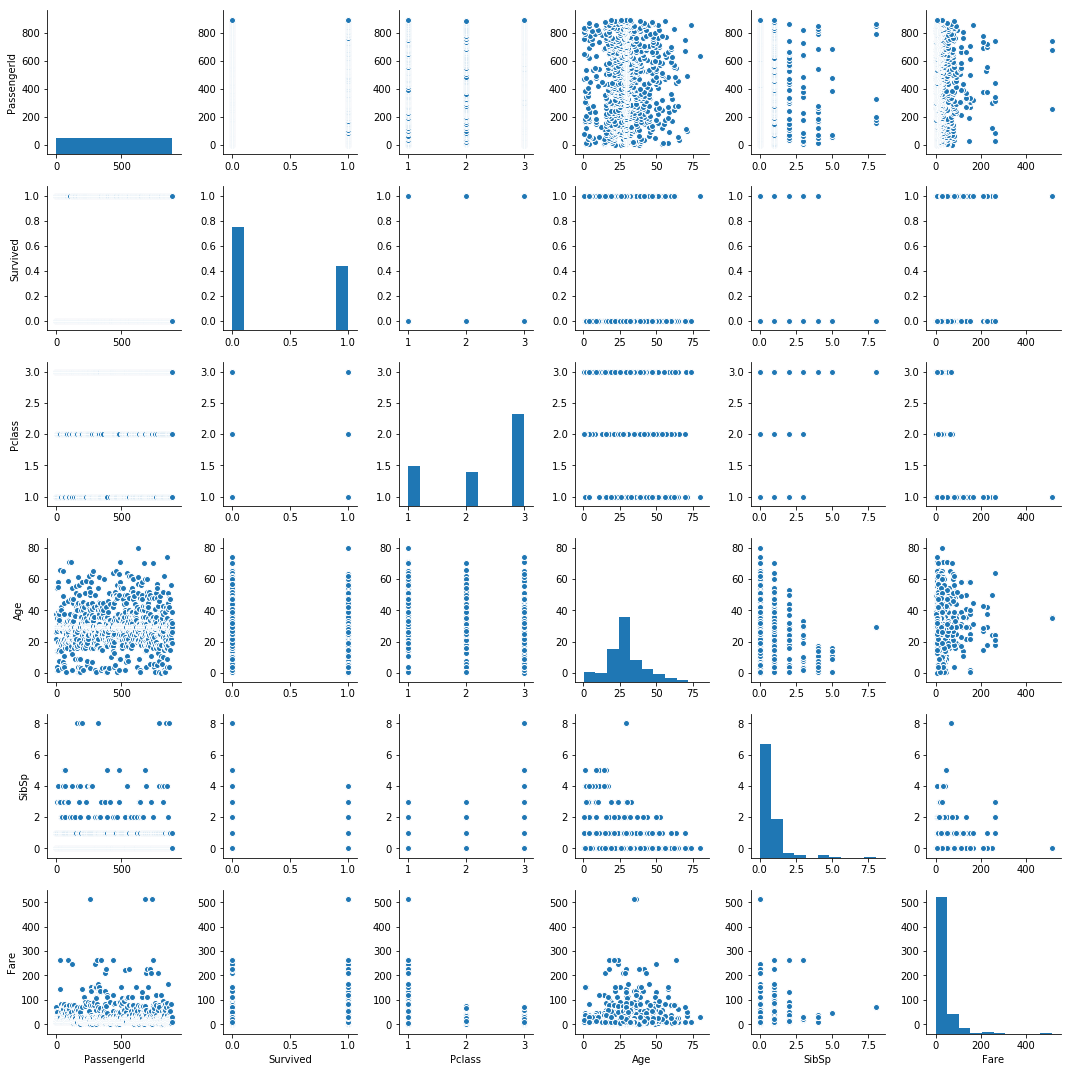

In [286]:
sns.pairplot(train_df)

**Survival By Gender**

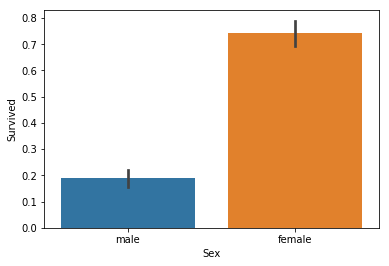

In [233]:
sns.barplot('Sex','Survived',data=train_df)

**Survival By Boarding Class**

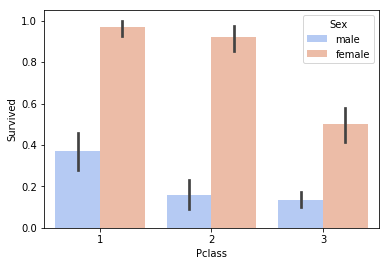

In [234]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df, palette='coolwarm')

**Total count per class based on Gender**

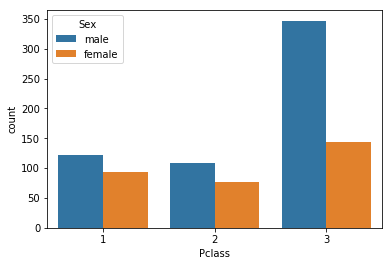

In [235]:
sns.countplot('Pclass',hue='Sex',data=train_df)

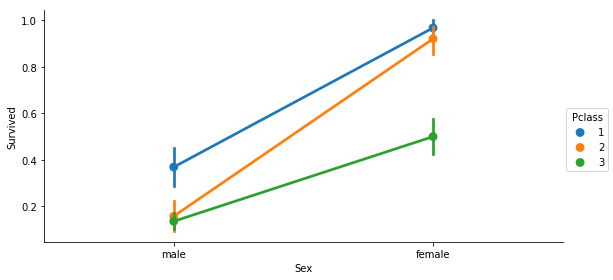

In [236]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train_df)

#### Plotting based on Embarkment town

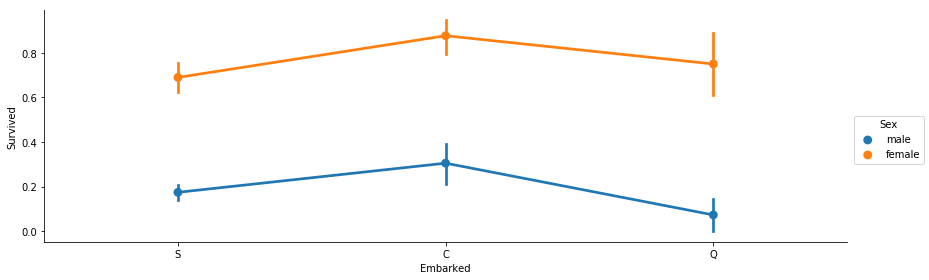

In [237]:
# plot
fig = plt.figure(figsize=(15,5))
sns.factorplot('Embarked','Survived', hue='Sex',data=train_df, size=4,aspect=3)

### Age Distribution

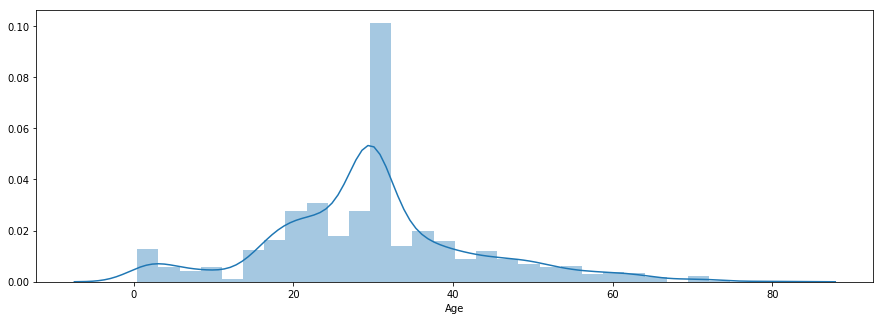

In [238]:
fig = plt.figure(figsize=(15,5))
sns.distplot(train_df['Age'])

#### Heatmap for correlation between Features

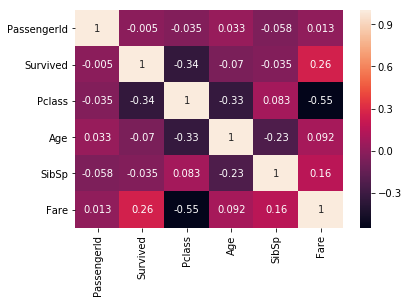

In [239]:
sns.heatmap(train_df.corr(),annot=True)

#### Training Data Split

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare',
       'Embarked'],
      dtype='object')

In [305]:
# X = train_df[['Pclass','Age', 'SibSp', 'Fare']]

# y = train_df['Survived']

X_train = train_df[['Pclass','Age', 'SibSp', 'Fare']]

y_train = train_df["Survived"]

X_test  = test_df[['Pclass','Age', 'SibSp', 'Fare']]

## Model fitting and Evaluation

### Linear Regression

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [307]:
lm = LinearRegression()

In [308]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [309]:
pred = lm.predict(X_test)

## Model Evaluation

**Evaluate the model by check the co-efficients**

In [310]:
print(lm.intercept_)

1.074716351399925


#### Coefficient for the two features (Age, Pclass)

In [311]:
lm.coef_ 

array([-0.20369914, -0.00789445, -0.03114024,  0.00093575])

In [312]:
co_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
co_df

,Coefficient
Pclass,-0.203699
Age,-0.007894
SibSp,-0.031140
Fare,0.000936


## Using Decision Tree 

In [314]:
from sklearn.tree import DecisionTreeClassifier

In [315]:
clf = DecisionTreeClassifier()

In [316]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [317]:
dt_pred = clf.predict(X_test)

In [318]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Fare      418 non-null float64
dtypes: float64(2), int64(2)
memory usage: 13.1 KB


In [320]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


#### Test Model on the test data

In [322]:
dt_pred = clf.predict(X_test)

**Create a submission file to Kaggle**

In [323]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": dt_pred
    })
submission.to_csv('submission.csv', index=False)